# Introduction
In my machine learning journey, more often than not, I have found that feature preprocessing is a more effective technique in improving my evaluation metric than any other step, like choosing a model algorithm, hyperparameter tuning, etc.

Feature preprocessing is one of the most crucial steps in building a Machine learning model. Too few features and your model won’t have much to learn from. Too many features and we might be feeding unnecessary information to the model. Not only this, but the values in each of the features need to be considered as well.

We know that there are some set rules of dealing with categorical data, as in, encoding them in different ways. However, a large chunk of the process involves dealing with continuous variables. There are various methods of dealing with continuous variables. Some of them include converting them to a normal distribution or converting them to categorical variables, etc.

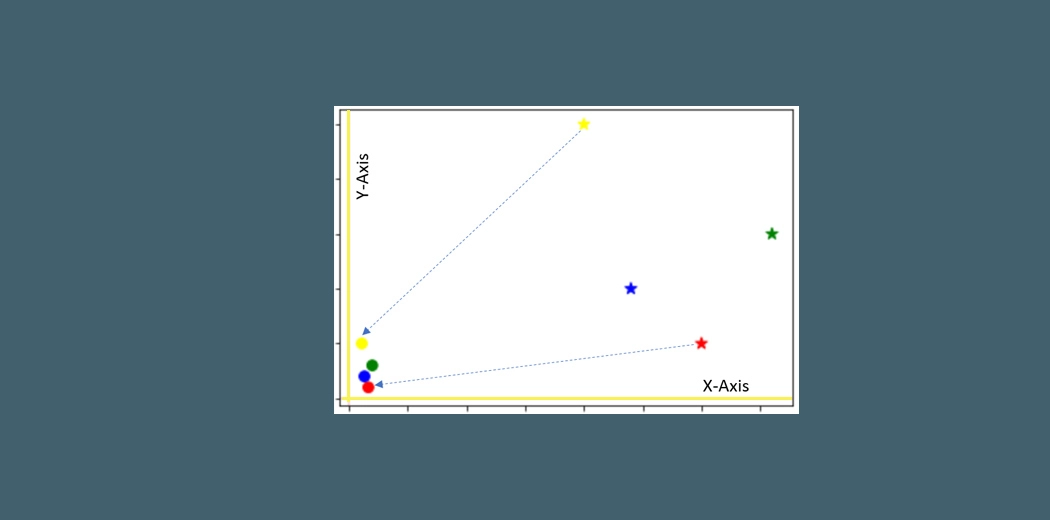

There are a couple of go-to techniques I always use regardless of the model I am using, or whether it is a classification task or regression task, or even an unsupervised learning model. These techniques are:

1.Feature Transformation and

2.Feature Scaling.

# Table of Contents
1.Why do we need Feature Transformation and Scaling?

2.MinMax Scaler

3.Standard Scaler

4.MaxAbsScaler

5.Robust Scaler

6.Quantile Transformer Scaler

7.Log Transformation

8.Power Transformer Scaler

9.Unit Vector Scaler/Normalizer
 

# Why do we need Feature Transformation and Scaling?
Oftentimes, we have datasets in which different columns have different units – like one column can be in kilograms, while another column can be in centimeters. Furthermore, we can have columns like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling.

In most examples of machine learning models, you would have observed either the Standard Scaler or MinMax Scaler. However, the powerful sklearn library offers many other feature transformations scaling techniques as well, which we can leverage depending on the data we are dealing with. So, what are you waiting for?

Let us explore them one by one with Python code.

We will work with a simple dataframe:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# getathe data set

In [4]:
df=pd.DataFrame({'Income':[15000,1800,120000,10000],'Age':[25,18,42,51],'Department':['HR','Legal','Marketing','Management']})

Before directly applying any feature transformation or scaling technique, we need to remember the categorical column: Department and first deal with it. This is because we cannot scale non-numeric values.

For that, we 1st create a copy of our dataframe and store the numerical feature names in a list, and their values as well:

In [5]:
df_scaled=df.copy()
col_names=["Income","Age"]
features=df_scaled[col_names]

We will execute this snippet before using a new scaler every time.

# MinMax Scaler
The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. The formula for calculating the scaled value is-

### x_scaled = (x – x_min)/(x_max – x_min)

Thus, a point to note is that it does so for every feature separately. Though (0, 1) is the default range, we can define our range of max and min values as well. How to implement the MinMax scaler?

1. We will first need to import it

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

 2. apply it on only the values of the features:

In [7]:
df_scaled[col_names]=scaler.fit_transform(features.values)

In [8]:
df.head()

,Income,Age,Department
0,15000,25,HR
1,1800,18,Legal
2,120000,42,Marketing
3,10000,51,Management


In [9]:
print(df_scaled)

     Income       Age  Department
0  0.111675  0.212121          HR
1  0.000000  0.000000       Legal
2  1.000000  0.727273   Marketing
3  0.069374  1.000000  Management


You can see how the values were scaled. The minimum value among the columns became 0, and the maximum value was changed to 1, with other values in between. However, suppose we don’t want the income or age to have values like 0. Let us take the range to be (5, 10)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(5,10))

In [13]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,5.558376,6.060606,HR
1,5.000000,5.000000,Legal
2,10.000000,8.636364,Marketing
3,5.346870,10.000000,Management


# Standard Scaler

just like the MinMax scaler the standard scaler is another popular scaler that is very easy to understand implement.

for each feature the stamdard scaler scales the values such that the mean is o and standard deviation is 1(or the variance)

  ### X_scaled=X-mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

1.either choose a different scaler

2.or first, convert the variables to a normal distribution and then apply this scaler

Implementing the standard scaler is much similar to implementing a min-max scaler. Just like before, we will first import StandardScaler and then use it to transform our variable.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,-0.449056,-0.685248,HR
1,-0.722214,-1.218219,Legal
2,1.723796,0.609110,Marketing
3,-0.552525,1.294358,Management


In [18]:
df_scaled.describe()

,Income,Age
count,4.000000,4.000000e+00
mean,0.000000,-5.551115e-17
std,1.154701,1.154701e+00
min,-0.722214,-1.218219e+00
25%,-0.594947,-8.184910e-01
50%,-0.500791,-3.806935e-02
75%,0.094157,7.804217e-01
max,1.723796,1.294358e+00


You will notice that the values are not exactly, but very close to 0(same with standard deviation). This occurs due to the numerical precision of floating-point numbers in Python.

 

# MaxAbsScaler
In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1].  To see how it works, we will add another column called ‘Balance” which contains negative values:

In [22]:
df["Balance"]=[100.0,-263.0,2000.0,-5.0]
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()

In [23]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125000,0.490196,HR
1,0.015000,0.352941,Legal
2,1.000000,0.823529,Marketing
3,0.083333,1.000000,Management


We can confirm that the MaxAbs Scaler works as expected by printing the maximum values of each column before we scaled it:

In [24]:
df["Income"].max(),df["Age"].max(),df['Balance'].max()

(120000, 51, 2000.0)

Thus, we can see that

each value in the Income column is divided by 12000
each value in the Age column is divided by 51
each value in the Balance column is divided by 2000

# Robust Scaler
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

removes the median from the data

scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

                 #           IQR = Q3 – Q1

Thus, the formula would be:

### X_scaled=(x-Q1)/(Q3-Q1)

This is the default range, though we can define our own range if we want to. Now let us see how can we implement the Robust Scaler in python:

In [25]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [26]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.075075,-0.404762,HR
1,-0.321321,-0.738095,Legal
2,3.228228,0.404762,Marketing
3,-0.075075,0.833333,Management


# Quantile Transformer Scaler
One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data. Here is the code for using the Quantile Transformer:

In [27]:
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()

In [28]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Income,Age,Department
0,0.666667,0.333333,HR
1,0.000000,0.000000,Legal
2,1.000000,0.666667,Marketing
3,0.333333,1.000000,Management


The effects of both the RobustScaler and the QuantileTransformer can be seen on a larger dataset instead of one with 4 rows. Thus, I encourage you to take up a larger dataset and try these Scalers on their columns to fully understand the changes to the data.

Log Transform
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) = 4.

Thus, in our example, while plotting the histogram of Income, it ranges from 0 to 1,20,000:



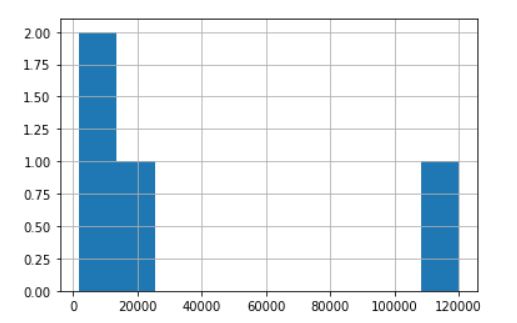

Let us see what happens when we apply log on this column:

In [29]:
df['log_income']=np.log(df['Income'])
# we created a new column to store the log values

In [31]:
print(df['log_income'])

0     9.615805
1     7.495542
2    11.695247
3     9.210340
Name: log_income, dtype: float64


In [32]:
print(df)

   Income  Age  Department  Balance  log_income
0   15000   25          HR    100.0    9.615805
1    1800   18       Legal   -263.0    7.495542
2  120000   42   Marketing   2000.0   11.695247
3   10000   51  Management     -5.0    9.210340


Wow! While our Income column had extreme values ranging from 1800 to 1,20,000 – the log values are now ranging from approximately 7.5 to 11.7! Thus, the log operation had a dual role:

Reducing the impact of too-low values
Reducing the impact of too-high values.
A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

Let us plot a histogram of the above, using 5 bins:

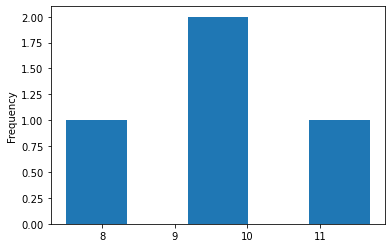

In [33]:
df['log_income'].plot.hist(bins=5)

# Power Transformer Scaler
I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values.

In our case, we will use the Box-Cox transform since all our values are positive.

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

In [36]:
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [37]:
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125158,-0.597385,HR
1,-1.395497,-1.301984,Legal
2,1.419403,0.681202,Marketing
3,-0.149064,1.218168,Management


# Unit Vector Scaler/Normalizer
Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [43]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


Thus, if you check the first row,

(.999999)^2 + (0.001667)^2 = 1.000(approx)

Similarly, you can check for all rows, and try out the above with norm = ‘l1’ as well.

You may refer to this article to understand the difference between Normalization and Standard Scaler – Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization

 

Custom Transformer
Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:

In [44]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log2, validate = True)

df_scaled[col_names] = transformer.transform(features.values)
df_scaled

,Income,Age,Department
0,13.872675,4.643856,HR
1,10.813781,4.169925,Legal
2,16.872675,5.392317,Marketing
3,13.287712,5.672425,Management


End Notes
To summarize saw the effects of feature transformation and scaling on our data and when to use which scaler. Also, we noticed that some scalers were sensitive to outliers, while others were robust. We also noticed how some scalers change the underlying distribution of the data itself.

Each feature scaling technique has its own characteristics which we can leverage to improve our model. However, just like other steps in building a predictive model, choosing the right scaler is also a trial and error process, and there is no single best scaler that works every time.

Keeping all these in mind, I encourage you to take up various datasets with different kinds of values and try applying these feature transformation and scaling techniques on them. Do comment below your findings on these scalers and how used them to improve your evaluation metric!